# Actividad Semanal 6: Visualización

*Alumno* - **Axel Alejandro Tlatoa Villavicencio**

*Matrícula* - **A01363351**

*Profesor* - **Jobish Vallikavungal Devassia**

*Materia* - **Ciencia y Analítica de Datos**

*Fecha* - **01 de Noviembre del 2022**

# Instrucciones

1. Descarga los datos sitio externo. y carga el dataset en tu libreta. 

2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna.

4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión.

5. Realiza el conteo de las variables categóricas.

6. Escala los datos, si consideras necesario

7. Reduce las dimensiones con PCA, si consideras necesario.
* Indica la varianza de los datos explicada por cada componente seleccionado Para actividades de exploración de los datos la varianza > 70%
* Indica la importancia de las variables en cada componente

8. Elabora los histogramas de los atributos para visualizar su distribución

9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

In [507]:
################################## Importamos librerías ###################################

In [508]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
from random import randint
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [509]:
url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [510]:
df = pd.read_csv(url)
df.head(3)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0


Reenombramos las variables para su visualización gráfica más acorde a los modelos de estimación que se desean plantear en el análisis. 

In [511]:
df.rename(columns = {'X1':'Crédito otorgado',
                     'X2':'Género',
                     'X3':'Educación',
                     'X4':'Estado civil',
                     'X5':'Edad',
                     'X6':'Estado de pago 09/05',
                     'X7':'Estado de pago 08/05',
                     'X8':'Estado de pago 07/05',
                     'X9':'Estado de pago 06/05',
                     'X10':'Estado de pago 05/05',
                     'X11':'Estado de pago 04/05',
                     'X12':'Estado de cuenta 09/05',
                     'X13':'Estado de cuenta 08/05',
                     'X14':'Estado de cuenta 07/05',
                     'X15':'Estado de cuenta 06/05',
                     'X16':'Estado de cuenta 05/05',
                     'X17':'Estado de cuenta 04/05',
                     'X18':'Monto pagado 09/05',
                     'X19':'Monto pagado 08/05',
                     'X20':'Monto pagado 07/05',
                     'X21':'Monto pagado 06/05',
                     'X22':'Monto pagado 05/05',
                     'X23':'Monto pagado 04/05',
                     'Y':'Probabilidad de incumplimiento'}, inplace = True)
df.head(3)

,ID,Crédito otorgado,Género,Educación,Estado civil,Edad,Estado de pago 09/05,Estado de pago 08/05,Estado de pago 07/05,Estado de pago 06/05,...,Estado de cuenta 06/05,Estado de cuenta 05/05,Estado de cuenta 04/05,Monto pagado 09/05,Monto pagado 08/05,Monto pagado 07/05,Monto pagado 06/05,Monto pagado 05/05,Monto pagado 04/05,Probabilidad de incumplimiento
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0


In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              30000 non-null  int64  
 1   Crédito otorgado                30000 non-null  int64  
 2   Género                          29999 non-null  float64
 3   Educación                       29998 non-null  float64
 4   Estado civil                    29998 non-null  float64
 5   Edad                            29995 non-null  float64
 6   Estado de pago 09/05            29997 non-null  float64
 7   Estado de pago 08/05            29995 non-null  float64
 8   Estado de pago 07/05            29993 non-null  float64
 9   Estado de pago 06/05            29991 non-null  float64
 10  Estado de pago 05/05            29984 non-null  float64
 11  Estado de pago 04/05            29986 non-null  float64
 12  Estado de cuenta 09/05          

Las variables presentadas son numéricas de tipo flotantes y enteros. 

In [513]:
df.drop(['ID'], axis=1, inplace=True)

Matamos la columna de *ID* ya que no nos aporta mucha información, es meramente clasificadora o un contador de usuarios. 

In [514]:
df.head(3)

,Crédito otorgado,Género,Educación,Estado civil,Edad,Estado de pago 09/05,Estado de pago 08/05,Estado de pago 07/05,Estado de pago 06/05,Estado de pago 05/05,...,Estado de cuenta 06/05,Estado de cuenta 05/05,Estado de cuenta 04/05,Monto pagado 09/05,Monto pagado 08/05,Monto pagado 07/05,Monto pagado 06/05,Monto pagado 05/05,Monto pagado 04/05,Probabilidad de incumplimiento
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0


In [515]:
df.shape

(30000, 24)

In [516]:
df['Probabilidad de incumplimiento'].fillna(value = 1, inplace = True)

In [517]:
df.isnull().values.any(), df.isna().values.any()

(True, True)

Se tomará la limpieza de los datos de las actividades pasadas.

In [518]:
# Limpiaremos los datos de la actividad pasada. 
dfp = df.copy() # Se crea copia y se guarda en variable 'data frame prime'
dfp.drop(['Probabilidad de incumplimiento'], axis=1, inplace=True)
dfp.dropna(axis = 0,thresh = 21, inplace = True) # Mantenemos las filas si y sólo sí tienen al menos 21 valores que no sean tipo NaN.
dfp.isnull().values.any(), dfp.isna().values.any()

(True, True)

In [519]:
# Reemplazamos los datos faltantes por la media de la muestra (edad)
dfp['Edad'].fillna(value = dfp.Edad.mean().round(), inplace = True)
# Seleccionamos todas las filas y columnas de X6 X11 por ser del tipo categóricas (ver documento)
[dfp[j].fillna(value = dfp[j].abs().mean().round(), inplace = True) for j in dfp.loc[:,'Estado de pago 09/05':'Estado de pago 04/05']] # Sustituimos valores faltantes por la moda
# Seleccionamos todas las filas y las columnas de X12 a X23
[dfp[i].fillna(value = dfp[i].median().round(2), inplace = True) for i in dfp.loc[:,'Estado de cuenta 09/05':'Monto pagado 04/05']]; # Sustituimos el valor de sus medianas en los valores faltantes NaN

Para la *edad* se ha elegido la **media** o el promedio de los datos porque para una densidad poblacional significativa es mejor ubicar el promedio (estadístico), con la finalidad de simular una referencia real de la muestra.  Referencia → [Metodología del INEGI](https://inegi.org.mx/contenidos/programas/ccpv/cpvsh/doc/serie_historica_censal_met_indicadores.pdf)

De las variables ($x_{6}-x_{11}$) contiene valores -1 que significa que ya no hay adeudos hasta 9 o mayor, ya que simboliza los meses que lleva el usuario de atraso de su adeudo. Se piensa como una variable categórica ya que el número de meses define que tan atrasado está el usuario y se puede clasificar con otros usuarios con respecto a los meses de atraso. Se utilizó la media. 

Para las demás columnas ($x_{12} → x_{23}$) que contienen valores monetarios en dólares ($), se utilizó la **mediana** debido al gran margen que existe entre un usuario y otro, esto se debe al adeduo acumulado y la disponibilidad de pago entre usuarios; por lo tanto, para evitar un gran sezgo se optó por usar la mediana y eliminar los casos extremos [max-min] como se muestra a continuación:

In [520]:
Gap = {'Máximo':dfp['Monto pagado 09/05'].max(),'Mínimo':dfp['Monto pagado 09/05'].min()} # var X18
print(Gap)

{'Máximo': 873552.0, 'Mínimo': 0.0}


In [521]:
dfp.head()

,Crédito otorgado,Género,Educación,Estado civil,Edad,Estado de pago 09/05,Estado de pago 08/05,Estado de pago 07/05,Estado de pago 06/05,Estado de pago 05/05,...,Estado de cuenta 07/05,Estado de cuenta 06/05,Estado de cuenta 05/05,Estado de cuenta 04/05,Monto pagado 09/05,Monto pagado 08/05,Monto pagado 07/05,Monto pagado 06/05,Monto pagado 05/05,Monto pagado 04/05
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Hay una reducción poco significativa entre los dataframes, $Δ = df - dfp$  de tan sólo 12 filas o datos muestreales, se concluye que la limpieza de datos no generó mucho sezgo con tan sólo un 0.04% de pérdida de información.

$\frac{\Delta}{no. \ datos \ originales} × 100 \% = \frac{12}{30000} ≈ 0.04 \% $

In [522]:
dfp.isna().values.any(),dfp.isnull().values.any()

(False, False)

**Habiendo limpiado los datos**, se procede a normalizarlos o estandarizarlos, para que en futuros análisis se evite el sezgo por la escala de algunos datos. Utilizando la métrica de estandarización:

$z = \frac{(x-\mu)}{\sigma}$

In [523]:
estandarizacion = StandardScaler()
dfT = estandarizacion.fit_transform(dfp)
ndf = pd.DataFrame(dfT)
ndf.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.136931,0.809865,0.185896,-1.057461,-1.245783,1.794739,1.782322,-0.696986,-0.666624,-1.530052,...,-0.668055,-0.672554,-0.663121,-0.652802,-0.341903,-0.227121,-0.296778,-0.308088,-0.314119,-0.293423
1,-0.366118,0.809865,0.185896,0.858388,-1.028809,-0.875023,1.782322,0.139196,0.188704,0.234754,...,-0.639320,-0.621700,-0.606300,-0.598052,-0.341903,-0.213626,-0.239990,-0.244267,-0.314119,-0.180940
2,-0.597362,0.809865,0.185896,0.858388,-0.160914,0.014897,0.111672,0.139196,0.188704,0.234754,...,-0.482498,-0.449821,-0.417284,-0.391747,-0.250264,-0.191929,-0.239990,-0.244267,-0.248676,-0.012216
3,-0.905687,0.809865,0.185896,-1.057461,0.164546,0.014897,0.111672,0.139196,0.188704,0.234754,...,0.032679,-0.232497,-0.186857,-0.156732,-0.221166,-0.169407,-0.228632,-0.237885,-0.244161,-0.237182
4,-0.905687,-1.234774,0.185896,-1.057461,2.334283,-0.875023,0.111672,-0.696986,0.188704,0.234754,...,-0.161327,-0.347104,-0.348243,-0.331608,-0.221166,1.334700,0.271105,0.266304,-0.269029,-0.255235


In [524]:
Y = df['Probabilidad de incumplimiento']
Y.shape

(30000,)

In [525]:
ndf.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,2.998800e+04,2.998800e+04,2.998800e+04,2.998800e+04,2.998800e+04,2.998800e+04,2.998800e+04,2.998800e+04,2.998800e+04,2.998800e+04,...,2.998800e+04,2.998800e+04,2.998800e+04,2.998800e+04,2.998800e+04,2.998800e+04,2.998800e+04,29988.000000,2.998800e+04,2.998800e+04
mean,6.065724e-17,-1.838673e-16,3.791078e-18,7.203048e-17,1.175234e-16,-2.274647e-17,-4.549293e-17,2.085093e-17,-3.317193e-17,-3.222416e-17,...,9.477694e-19,-8.529925e-18,5.686617e-18,5.307509e-17,-1.137323e-17,1.469043e-17,-1.516431e-17,0.000000,-2.582672e-17,1.303183e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017,1.000017e+00,1.000017e+00
min,-1.214013e+00,-1.234774e+00,-2.344591e+00,-2.973310e+00,-1.571243e+00,-1.764944e+00,-1.558978e+00,-1.533168e+00,-1.521953e+00,-1.530052e+00,...,-2.945389e+00,-3.314699e+00,-2.000750e+00,-6.354461e+00,-3.419033e-01,-2.570191e-01,-2.967785e-01,-0.308088,-3.141186e-01,-2.934232e-01
25%,-9.056873e-01,-1.234774e+00,-1.079347e+00,-1.057461e+00,-8.118352e-01,-8.750235e-01,-7.236530e-01,-6.969856e-01,-6.666244e-01,-6.476489e-01,...,-6.395259e-01,-6.363564e-01,-6.340976e-01,-6.317148e-01,-2.815347e-01,-2.207421e-01,-2.746310e-01,-0.289149,-2.975943e-01,-2.867867e-01
50%,-2.119555e-01,8.098646e-01,1.858965e-01,8.583882e-01,-1.609142e-01,1.489730e-02,1.116719e-01,1.391964e-01,1.887039e-01,2.347543e-01,...,-3.883499e-01,-3.764470e-01,-3.653309e-01,-3.660931e-01,-2.151292e-01,-1.698414e-01,-1.945594e-01,-0.212356,-2.159549e-01,-2.090611e-01
75%,5.588576e-01,8.098646e-01,1.858965e-01,8.583882e-01,5.984937e-01,1.489730e-02,1.116719e-01,1.391964e-01,1.887039e-01,2.347543e-01,...,1.896884e-01,1.753960e-01,1.625981e-01,1.734821e-01,-3.969796e-02,-4.005126e-02,-4.091844e-02,-0.051909,-5.028721e-02,-6.845755e-02
max,6.417037e+00,8.098646e-01,5.246871e+00,2.774237e+00,4.720994e+00,7.134264e+00,6.794272e+00,6.828652e+00,7.031330e+00,7.293980e+00,...,2.331451e+01,1.318450e+01,1.458525e+01,1.549276e+01,5.239323e+01,7.282899e+01,5.058788e+01,39.325002,2.759900e+01,2.943950e+01


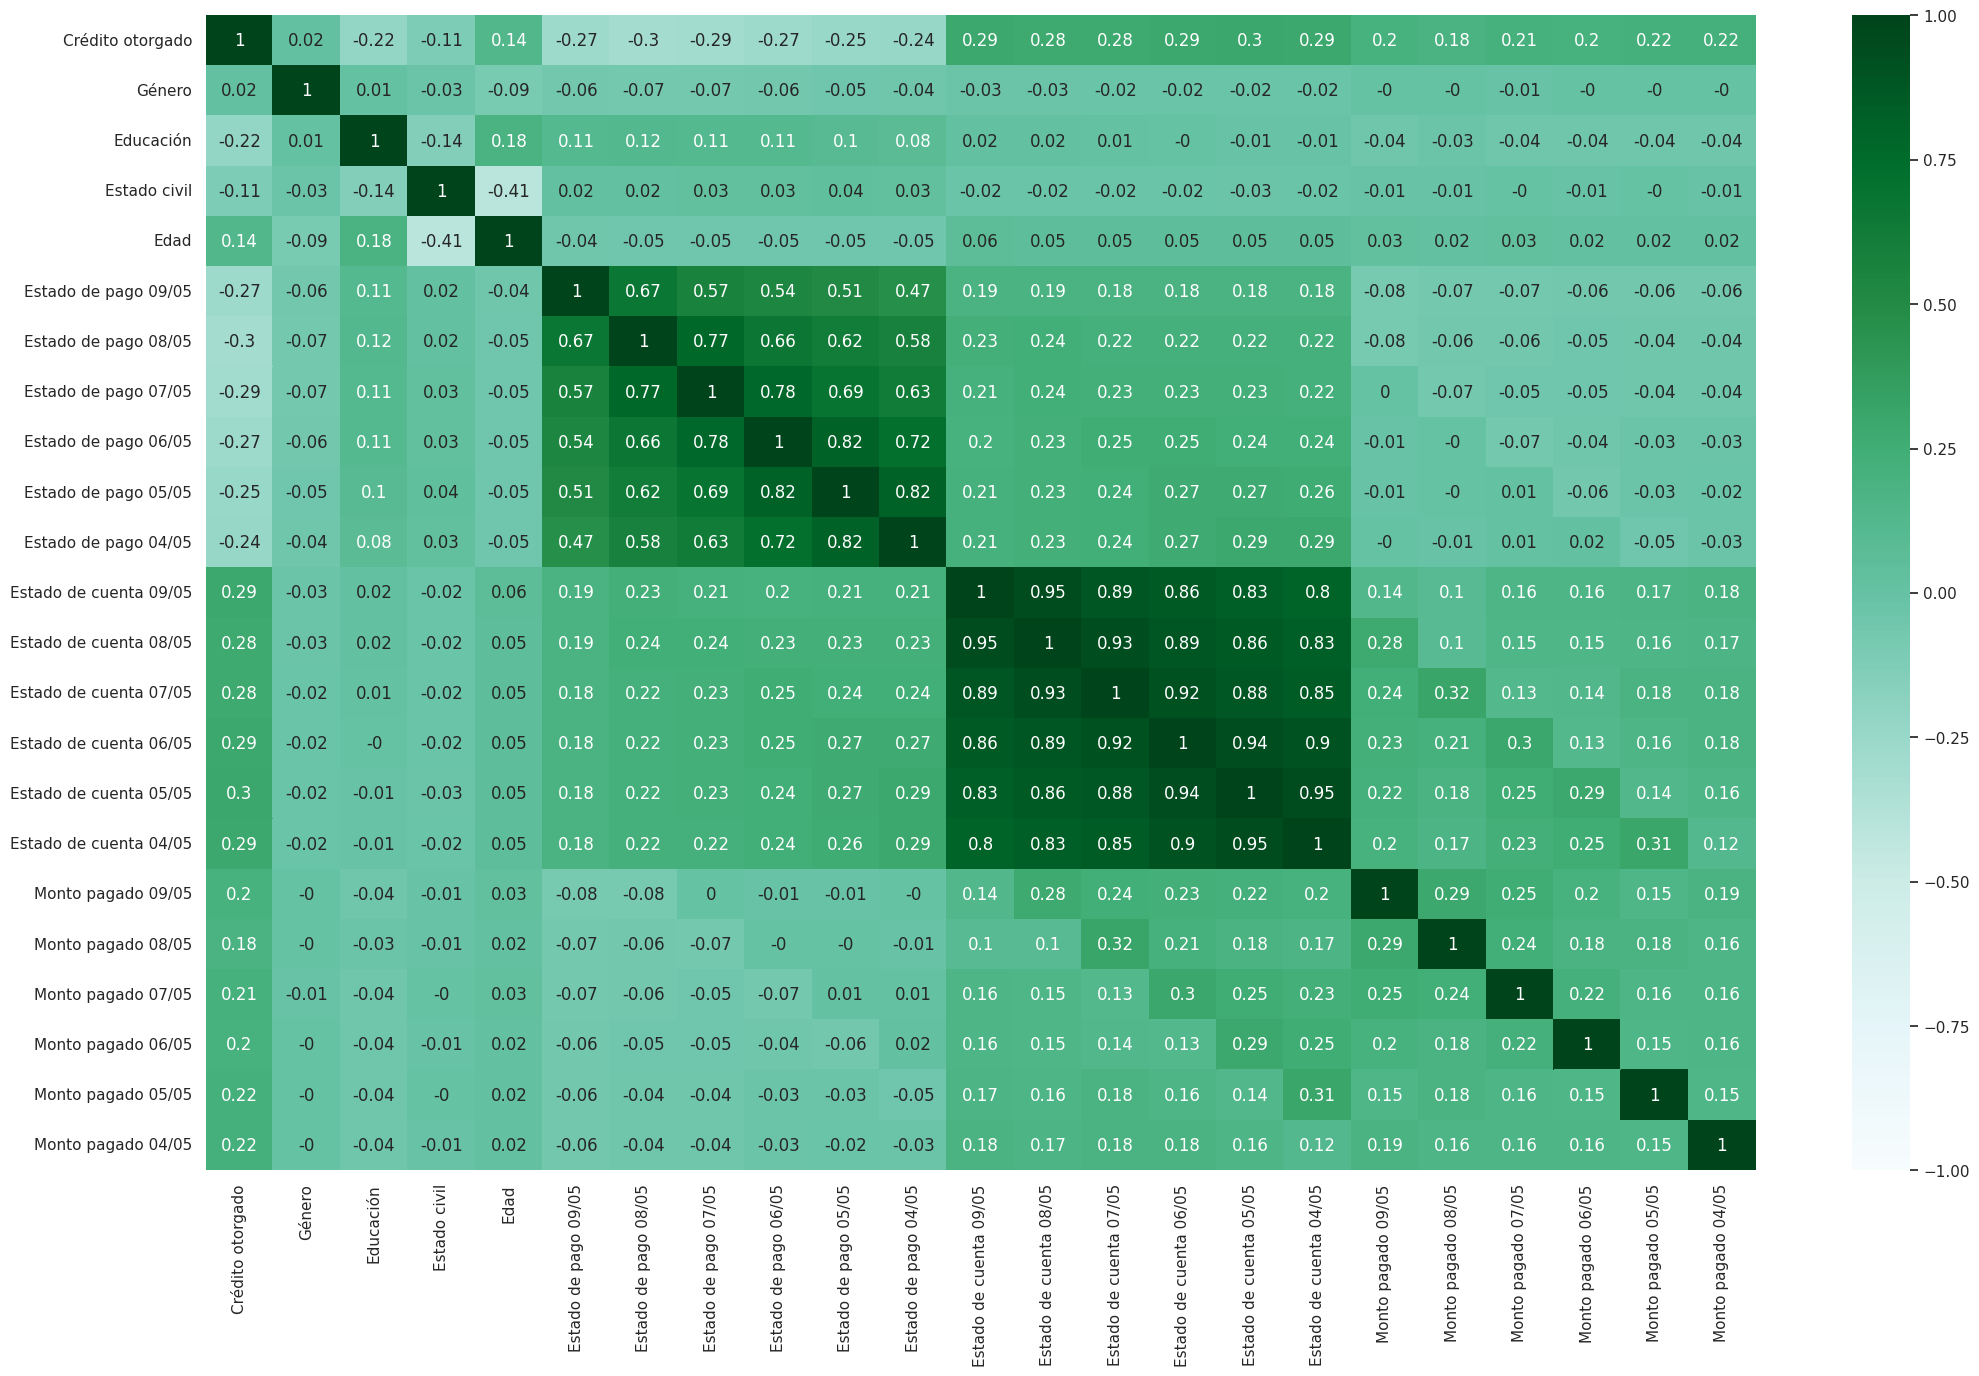

In [532]:
correlaciones = dfp.corr().round(2)
sns.set(rc = {'figure.figsize':(25,15)})
sns.heatmap(correlaciones, vmin = -1 , vmax = 1, cmap = 'BuGn', annot = True)

Notamos una alta correlación en las variables de los montos de los estados de cuenta vs los mismos montos de los estados de cuenta, por lo que se puede aplicar el análisis de componentes principales para reducir esas características.

In [527]:
pca = PCA() # Estima dos componentes ortogonales a sí mismas
df_nueva = pca.fit_transform(ndf) # Proyecta los datos originales al espacio de PCA's

In [528]:
resumen_ndfp = pd.DataFrame({'Desviación estándar': np.sqrt(pca.explained_variance_),
                             'Proporción de varianza explicada %': pca.explained_variance_ratio_ * 100,
                             'Proporción de varianza acumulada %': np.cumsum(pca.explained_variance_ratio_ *100)
                             })
resumen_ndfp = resumen_ndfp.transpose()
resumen_ndfp.columns = ['PC{}'.format(i) for i in range(1, len(resumen_ndfp.columns) + 1)]
resumen_ndfp.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Desviación estándar,2.558,2.0244,1.2454,1.2133,1.0126,0.9783,0.9527,0.9422,0.9334,0.8848,...,0.7242,0.6355,0.5097,0.4992,0.4345,0.3630,0.2649,0.2020,0.1591,0.1524
Proporción de varianza explicada %,28.448,17.8175,6.7436,6.3997,4.4581,4.1613,3.9462,3.8592,3.7880,3.4040,...,2.2803,1.7560,1.1295,1.0835,0.8210,0.5729,0.3050,0.1774,0.1100,0.1010
Proporción de varianza acumulada %,28.448,46.2655,53.0090,59.4087,63.8668,68.0281,71.9743,75.8335,79.6215,83.0255,...,93.9436,95.6997,96.8292,97.9127,98.7336,99.3066,99.6116,99.7890,99.8990,100.0000


Con las primeras 10 componentes principales se explica el 83% de la varianza acumulada total. 

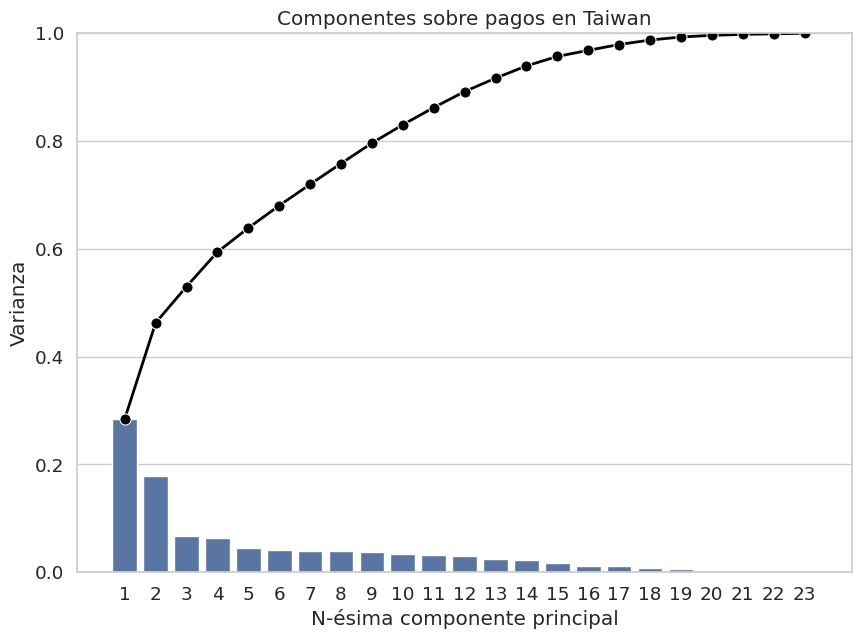

In [529]:
PC_componentes = np.arange(pca.n_components_) + 1
#Componentes de PCA

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_componentes, 
                y = pca.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_componentes-1, 
                 y = np.cumsum(pca.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 legend = 'auto',
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Componentes sobre pagos en Taiwan')
plt.xlabel('N-ésima componente principal')
plt.ylabel('Varianza')
plt.ylim(0, 1)
plt.show()

In [545]:
pcscomponentes = pd.DataFrame(pca.components_.transpose()*100, 
                                columns=resumen_ndfp.columns,
                                index=ndf.columns
                                )
pcscomponentes.iloc[:,8:23]

,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,2.159158,1.743822,0.863210,-9.874732,35.864224,-75.456426,-2.277547,4.241265,-2.515509,0.668231,0.652482,-0.985604,1.451094,-0.063396,0.278464
1,1.862728,2.427769,-0.900547,5.665186,17.643103,11.286675,2.452879,-0.024695,2.121755,-0.388606,-0.190592,0.185571,-0.065892,-0.080370,0.086334
2,-15.488311,6.260101,0.121152,-18.530133,8.423615,-37.283295,-3.575834,0.971192,-4.063941,0.437202,0.205671,-0.272896,0.059458,0.141651,0.171753
3,-5.592088,3.863455,-1.063379,-14.175885,66.698937,13.289923,0.598364,0.650833,-1.439459,-0.556862,-0.071795,-0.251491,-0.019325,0.070216,-0.119598
4,4.683756,0.806325,-2.118900,-4.787105,57.779120,43.172888,2.335006,0.125964,0.052105,-0.565879,-0.570063,-0.006196,-0.159496,0.002920,0.026172
5,-3.041637,0.336007,4.486710,62.308220,15.605492,-9.896627,-60.848359,-24.205530,1.584578,13.496852,-3.286108,-0.514017,-0.031831,-0.283726,0.023317
6,-3.335759,0.657215,2.823133,37.652608,8.121052,-8.370065,32.100519,55.819661,-7.005382,-48.597412,13.905640,-3.114744,1.261676,0.328247,-0.003576
7,-1.152108,-2.487040,-10.673622,10.116087,5.166528,-8.428853,54.213362,-10.650113,-15.781016,60.621947,-30.488125,2.526010,-2.792245,-0.854499,-0.483753
8,4.431261,-5.686453,-0.718000,-21.171955,1.804769,-6.039417,17.074063,-58.554381,7.681089,-22.756657,56.728812,1.931363,0.174536,1.409824,-0.143966
9,5.445827,6.674354,1.042007,-35.881930,-2.334294,-2.025796,-17.825413,-7.739729,14.513036,-38.404664,-67.519181,2.724681,2.341273,-0.836241,-0.058079


Se puede observar las componentes PC10, PC11, PC22 hay una varianza arriba del 70% con una correlación negativa y positiva bastante proununciada.

In [541]:
pcscomponentes.iloc[:,:].abs().idxmax()

PC1     14
PC2      8
PC3      4
PC4      4
PC5      1
PC6      2
PC7     21
PC8     20
PC9     22
PC10    19
PC11    17
PC12     5
PC13     3
PC14     0
PC15     5
PC16     8
PC17    11
PC18     7
PC19     9
PC20    14
PC21    13
PC22    15
PC23    12
dtype: int64

Aquí nos percatamos que las variables más importantes de acuerdo al análisis previo son la 19, 17 y 14 que corresponden a Monto pagado 08/05, Estado de cuenta 04/05 y Estado de cuenta 06/05

In [558]:
import seaborn as sb


In [563]:
ndf_columnas_numericas = ['Estado de pago 04/05',
                              'Estado de cuenta 09/05',
                              'Estado de cuenta 08/05',
                              'Estado de cuenta 07/05',
                              'Estado de cuenta 06/05',
                              'Estado de cuenta 05/05',
                              'Estado de cuenta 04/05',
                              'Monto pagado 09/05',
                              'Monto pagado 08/05',
                              'Monto pagado 07/05',
                              'Monto pagado 06/05',
                              'Monto pagado 05/05',
                              'Monto pagado 04/05']

In [564]:
ndf_columnas_categoricas = ['Estado de pago 09/05',
                     'Estado de pago 08/05',
                     'Estado de pago 07/05',
                     'Estado de pago 06/05',
                     'Estado de pago 05/05']

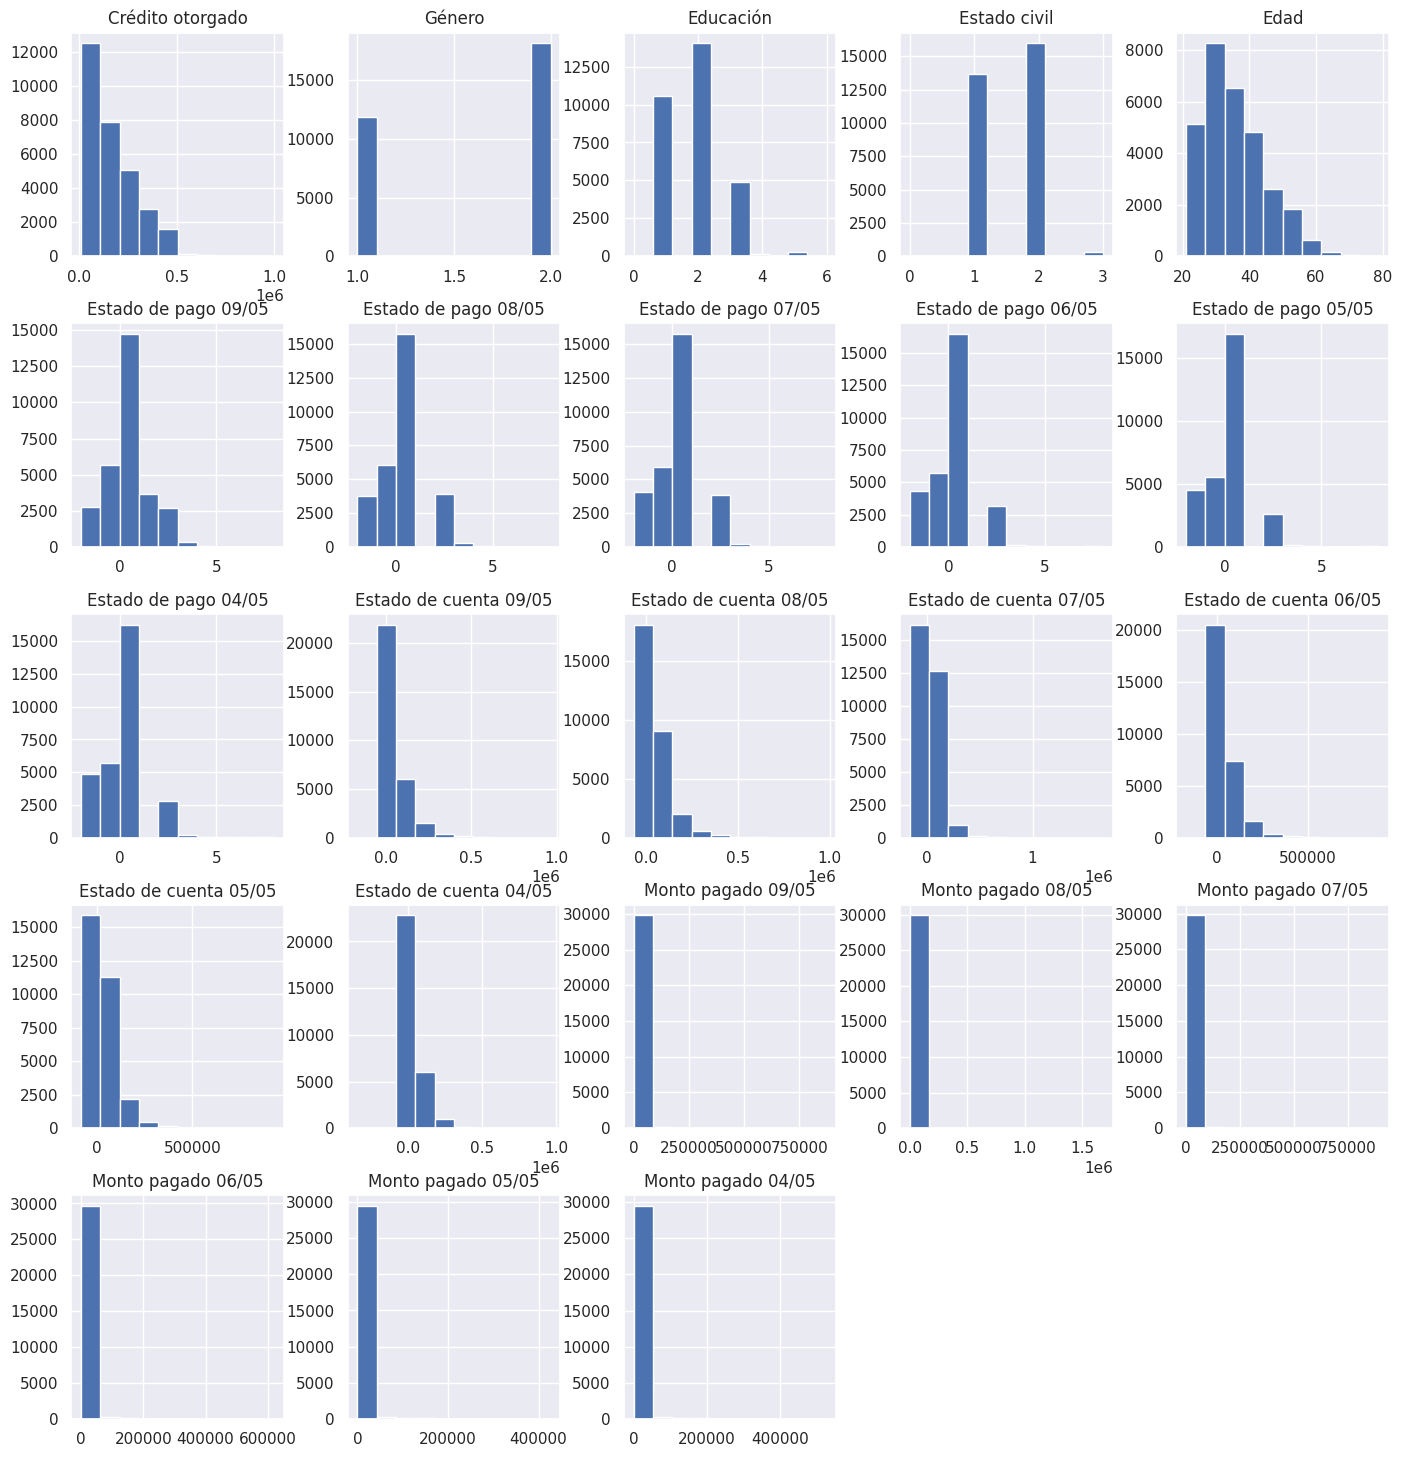

In [570]:
dfp.hist();

Se puede apreciar que las cantidades de montos pagados son las más prominentes. 